<a href="https://colab.research.google.com/github/JoaquinJustelP/Python_UB_2024/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

Clustering se refiere a un set de técnicas para encontrar subgrupos o clusters en un conjunto de datos.

Lo que se busca, por tanto, es una partición de los datos en grupos tal que las observaciones dentro de cada uno sean similares entre ellas.

La distinción entre similares o diferentes dependerá mucho de los datos que se estén usando y el conocimiento que se tenga.

## Aplicaciones

Supongamos que tenemos acceso a una gran cantidad de medidas (empleo, ingresos, vivienda...) para un gran número de personas.

Nuestro objetivo sería hacer una segmentación de mercado identificadno los diferentes subgrupos de personas que puedan ser más receptivos a un producto en concreto o a un tipo de publicidad.

## Tipos

Veremos dos tipos de clustering:

* K-means clustering: buscamos la partición de observaciones en un numero predefinido de clusters.
* Cluster jerárquico: no sabemos cuantos clusters queremos, terminaremos con una representación tipo árbol de las observaciones, dendograma, que nos permitirá ver a la vez los agrupamientos obtenido para cada número posible de clusters, de 1 a n.


## **K-means clustering**

Primero hay que tener en cuenta dos cosas, primero, todas las observaciones pertenecen por lo menos a un cluster. Y segundo, los clusters no se puede solapar, por lo tanto, una observación solo puede pertenecer a un cluster solamente.

La idea detrás de K-means es que un buen clustering es aquel en el que la variabilidad dentro del cluster es lo menor posible. Es decir, que dentro de cada claster las observaciones difieran lo menos posible entre ellas.

En otras palabras, queremos hacer una particion de las observaciones en K clusters en que la variabilidad dentro de ellos, sumada para todos los K clusters, sea lo más pequeña posible.




### **Pasos a seguir**

*  Paso 1:
Seleccionar el numero de clusters que queremos identificar en nuestros datos. Esta es la "K".

*  Paso 2:
Seleccionar de manera aleatoria 3 puntos distintos, a partir de los cuales se formarán los clusters iniciales

*  Paso 3:
Calcular las distancias de cada puntoa los tres diferentes puntos del paso anterior:

*  Paso 4:
Asignar los puntos al cluster mas cercano, es decir, el que esté a una menor distancia

*  Paso 5:
Calcular la media de cada cluster y repetir el proceso pero con esta media de cada cluster obtenida hasta que la asignación no cambie.

Podemos ver la calidad del clustering mirando la variabilidad dentro de cada cluster, llevar cuenta de la variabilidad total del clustering y empezar con otros puntos aleatorios.

Por lo general, la distancia entre las observaciones se mide con la distancia euclídea.

¿Como podemos saber el número de K usar? Una manera es probar diferentes números de K y ver cuando la variabilidad es menor.
Podemos graficar estos valores y tendremos un gráfico de codo, donde la variabilidad ira bajando a medida que aumenta el número de clusters hasta que llega un punto en que empeora.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(context='talk', rc={'figure.figsize':(7,5)})
# K-Means clusterer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import pairwise_distances_argmin

In [ ]:
def make_clusters(n, std):
    """Generates n clusters with 2 features"""
    centers = np.random.rand(n,2)*4
    blobs = make_blobs(50, centers=centers,cluster_std=std)[0]
    plt.scatter(blobs.T[0], blobs.T[1])
    plt.axis('equal')
    return blobs

def find_clusters(X, n_clusters):
    """K-Means with random init of centroids"""
    # 1. make random cluster centers
    i = np.random.permutation(X.shape[0])[:n_clusters]

    # chose a known point of the data to be the random initial center
    centers = X[i]

    # init lists to store the iterations
    labels_rec = []
    centers_rec = [centers]

    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, axis=1)
        labels_rec.append(labels)

        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        centers_rec.append(new_centers)
    return centers_rec, labels_rec

def plot_kmeans_iter(X, n_clusters):
    """plots the iterations of k-means"""
    # finde the clusters
    centers, labels = find_clusters(X, n_clusters)

    # make some colors for the plot
    palette = sns.color_palette(palette='muted',n_colors=n_clusters).as_hex()
    my_cmap = ListedColormap(palette)

    #plot!
    fig, axes = plt.subplots(len(centers),1, figsize=(7, len(centers)*5))
    for i, ax in enumerate(axes):
        ax.scatter(X[:,0], X[:,1], c=labels[i], cmap=my_cmap, alpha=0.6)
        ax.scatter(centers[i][:,0], centers[i][:,1], s=100, marker='x', c='k')
        ax.axis('equal')
        if i == 0:
            ax.set_title('Random init of centers', fontsize=14)
        else:
            ax.set_title(f'interation {i}', fontsize=14)
    plt.show()

def plot_cluster(X, clusterer):
    y = clusterer.fit_predict(X)
    palette = sns.color_palette(palette='muted',n_colors=clusterer.n_clusters).as_hex()
    my_cmap = ListedColormap(palette)
    centers = clusterer.cluster_centers_
    plt.figure(figsize=(8,6))
    for label in np.unique(y):
        plt.scatter(X[y==label,0], X[y==label,1], alpha=0.7)
    plt.scatter(centers[:,0], centers[:,1], s=100, marker='x', c='k')

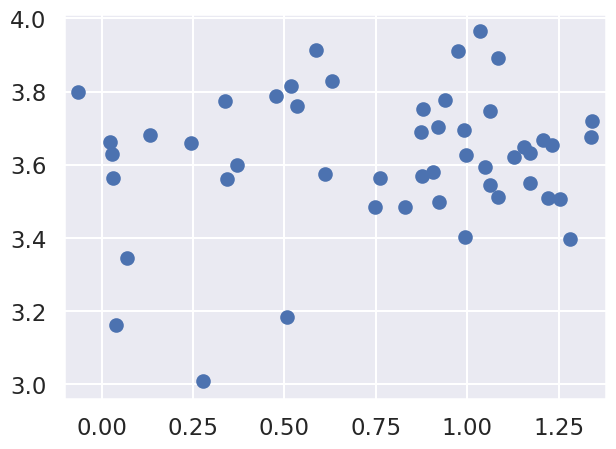

In [ ]:
X = make_clusters(3, 0.2)

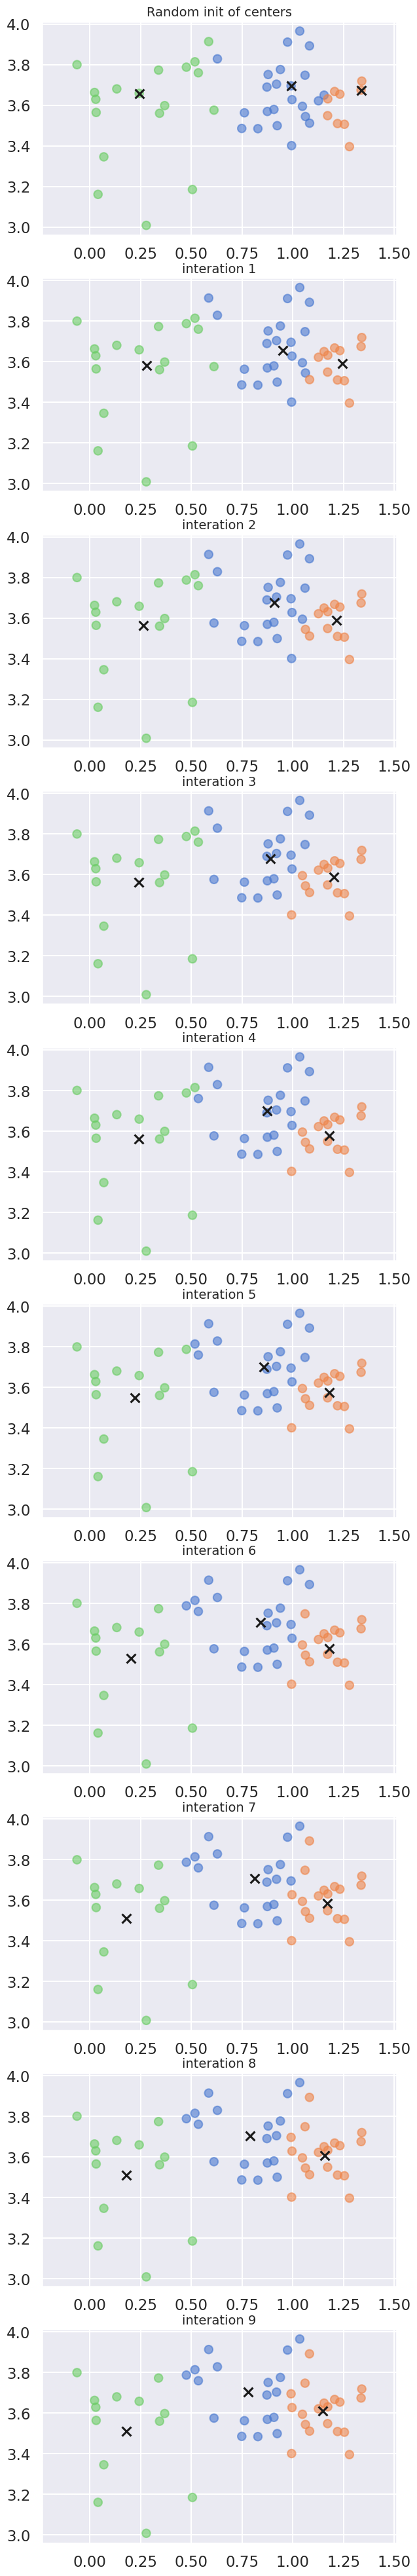

In [ ]:
plot_kmeans_iter(X, 3)

**Usando ScikitLearn**

Ahora vamos a usar la clase KMeans del grupo de módulos de sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)  # fit the data and return the cluster labels

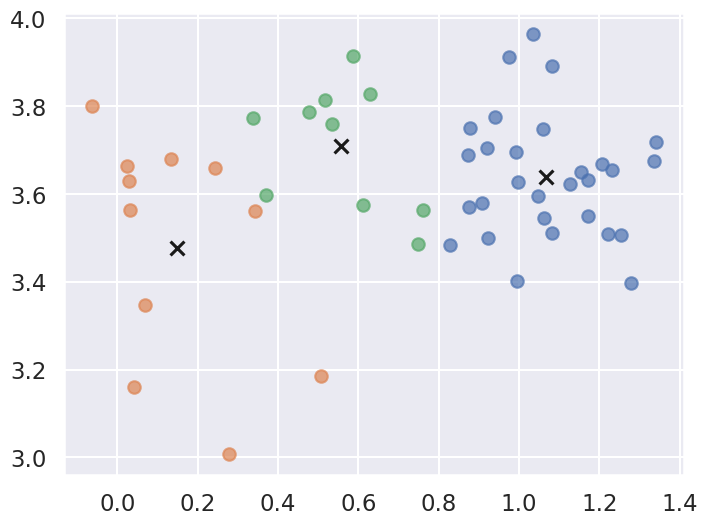

In [ ]:
plot_cluster(X, km)

Aquí hemos usado el parámetro init="random" pero se recomienda encarecidamente usar init='kmeans++', una forma más inteligente de inicializar los centroides que mejora mucho el rendimiento del algoritmo.

### **Método Elbow**

El método del codo es una herramienta gráfica para estimar el número óptimo de conglomerados k.

Para medir qué tan bueno es el resultado de las k-medias se usa la inercia del del cluster, que es la suma de los errores cuadráticos (SSE) entre el centroide y los miembros del cluster.

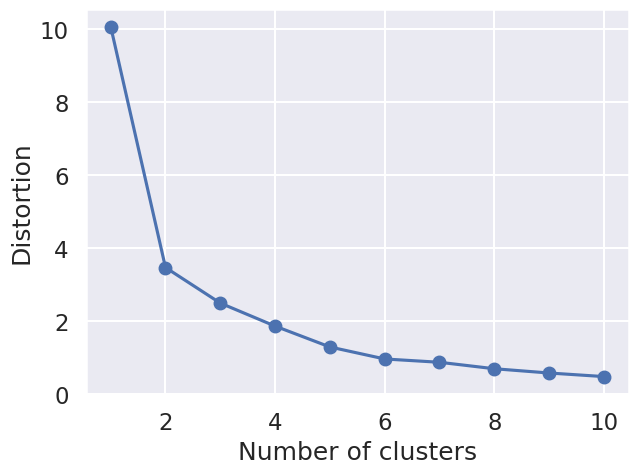

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Un problema de k-menas es que presenta problemas con según que distribución tienen los clústers, por ejemplo cuando son esfericos.

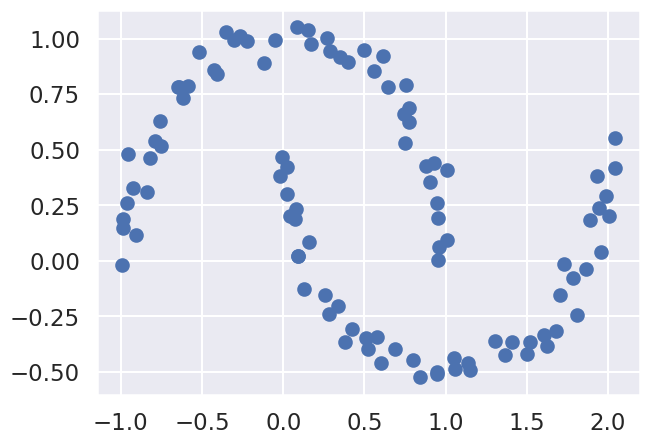

In [ ]:
moons = make_moons(noise=0.05)[0]
plt.scatter(moons[:,0], moons[:,1])

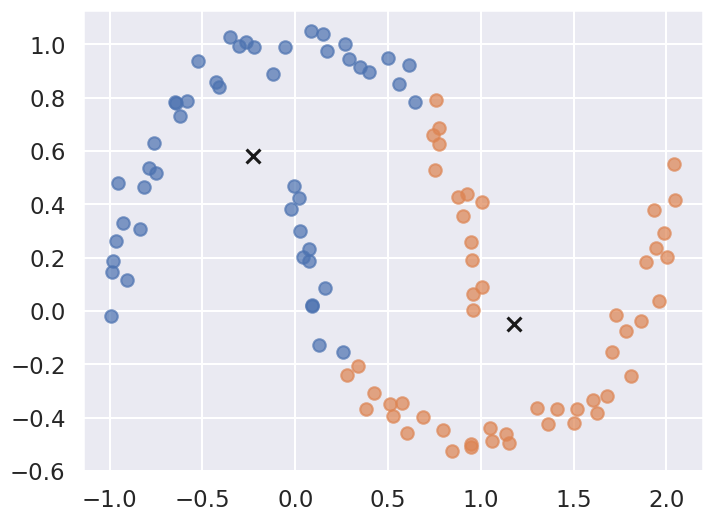

In [ ]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
plot_cluster(moons, km)

## Clustering jerárquico

Una de las mayores desventajas del k-means es precisamente que se necesita especificar de antemano el número de clústers K. Una alternativa para evitar este problema es el uso del clustering jerárquico, que no requiere de una elección de K. Otra ventaja que tiene es que el resultado es más visual.

Hay dos tipos, el aglomerativo y el divisivo.





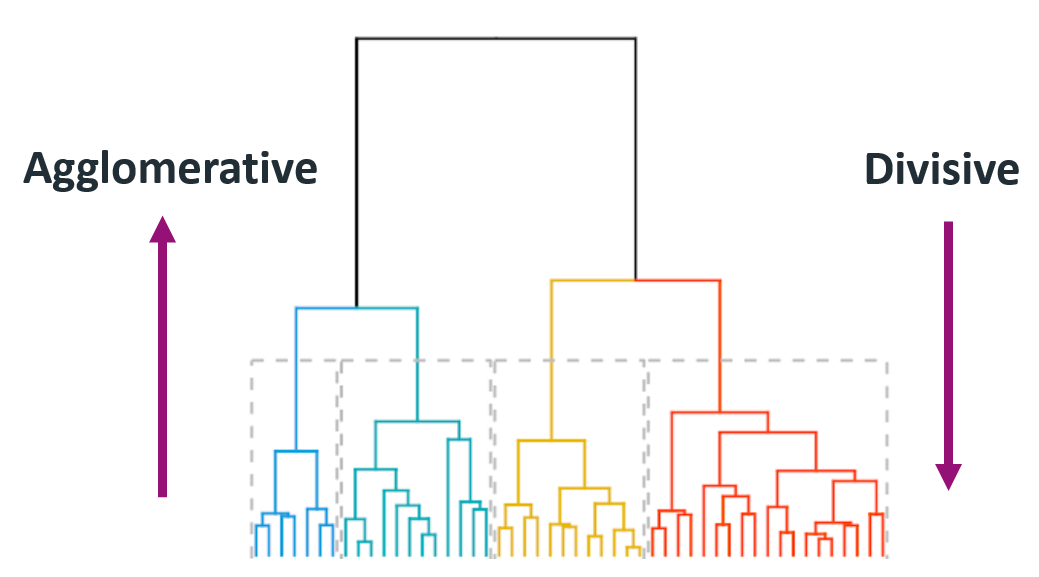

Veamos el bottom-up o aglomerativo, que es el más típico y se refiere a que el dendograma (árbol inverso) se empieza desde las hojas (observaciones) y se van combinando en clusters hasta llegar al tronco.

Los pasos son los siguientes:

* Paso 1: Empezar con cada punto en su propio cluster
* Paso 2: Identificar los dos clusters más cercanos y combinarlos
* Paso 3: Repetir hasta que todos los puntos queden un solo cluster.

La cercanía de los clusters se suele medir con la distancia euclídea, aunque pueden usarse otras como la manhattan.

Otro punto a tener en cuenta es que para medir la cercanía entre dos clusters se pueden usar distintos tipos de 'linkage', que mide la disimilaridad entre dos grupos de observaciones:

* Completo: Computa las disimilaridades a pares entre las observaciones en el cluster A y las observaciones en el cluster B y guarda la mayor de estas.
* Single: Computa las disimilaridades a pares entre las observaciones en el cluster A y las observaciones en el cluster B y guarda la menor de estas.
* Average: Computa las disimilaridades a pares entre las observaciones en el cluster A y las observaciones en el cluster B y guarda la media de estas.
* Centroid: Disimilaridad entre el centroide del cluster A y el del cluster B.

In [ ]:
%config Completer.use_jedi=False
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.DataFrame(
    {
    'math': [20, 25, 35, 40],
    'science': [25, 22, 40, 35]
    },
    index=['a', 'b', 'c', 'd']
    )
df

,math,science
a,20,25
b,25,22
c,35,40
d,40,35


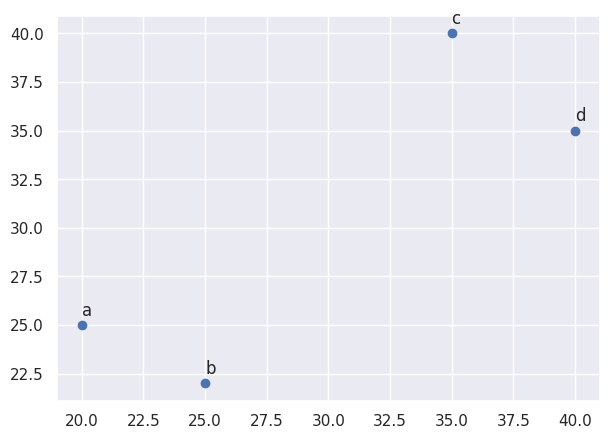

In [ ]:

def plot_ploints(df):
    plt.scatter(df.math, df.science)
    for i in range(len(df)):
        y_offset = 0.5
        plt.text(df.math[i], df.science[i]+y_offset, df.index[i])
    plt.show()

plot_ploints(df)

**Cálculo de distancias por pares**

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
distances = pd.DataFrame(pairwise_distances(df), columns=df.index, index=df.index)
distances

,a,b,c,d
a,0.000000,5.830952,21.213203,22.360680
b,5.830952,0.000000,20.591260,19.849433
c,21.213203,20.591260,0.000000,7.071068
d,22.360680,19.849433,7.071068,0.000000


a y b son los puntos más cercanos por lo que se convierten en un nuevo cluster

In [ ]:
df_c1 = df.copy()
df_c1.loc['ab', :] = df_c1.loc[['a', 'b'], :].mean(axis=0)
df_c1 = df_c1.drop(['a', 'b'], axis=0)
df_c1

,math,science
c,35.0,40.0
d,40.0,35.0
ab,22.5,23.5


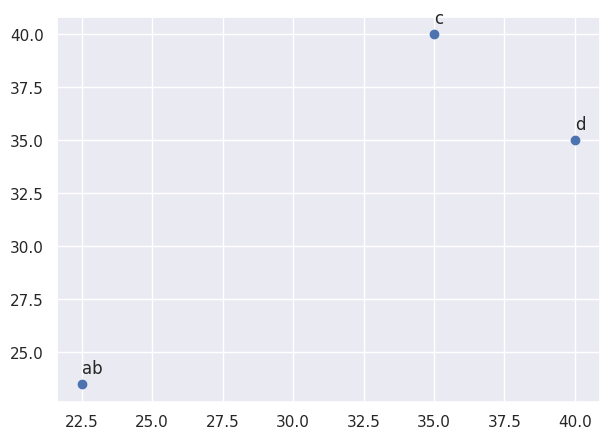

In [ ]:

plot_ploints(df_c1)

In [ ]:
distances1 = pd.DataFrame(pairwise_distances(df_c1), columns=df_c1.index, index=df_c1.index)
distances1

,c,d,ab
c,0.000000,7.071068,20.700242
d,7.071068,0.000000,20.940392
ab,20.700242,20.940392,0.000000


In [ ]:
df_c2 = df_c1.copy()
df_c2.loc['cd', :] = df_c2.loc[['c', 'd'], :].mean(axis=0)
df_c2 = df_c2.drop(['c', 'd'], axis=0)
df_c2

,math,science
ab,22.5,23.5
cd,37.5,37.5


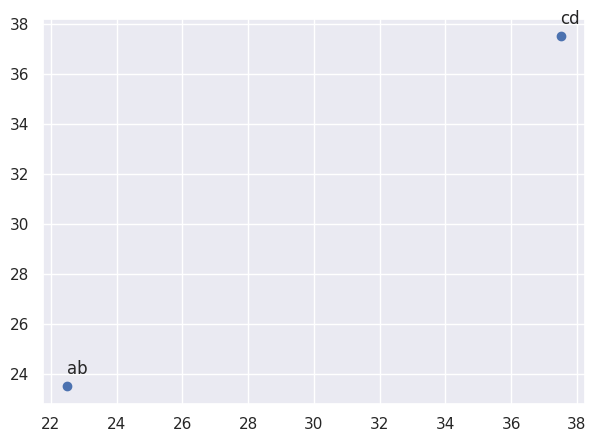

In [ ]:
plot_ploints(df_c2)

**SkLearn**

In [ ]:

from sklearn.cluster import AgglomerativeClustering

# used to plot the dendogram
from scipy.cluster.hierarchy import dendrogram , linkage

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels = agg_clustering.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='math', ylabel='science'>

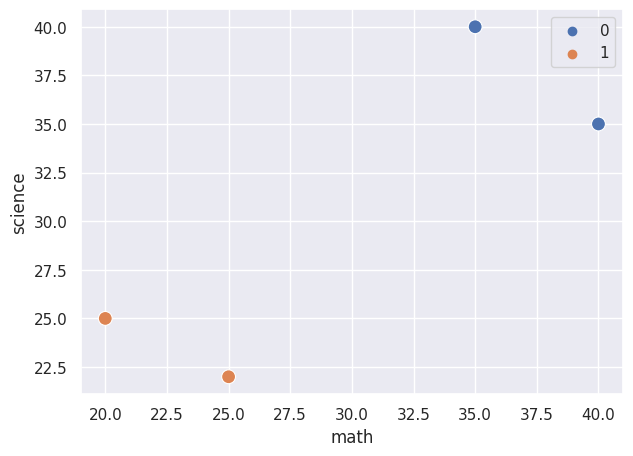

In [ ]:
sns.scatterplot(x=df.math, y=df.science, hue=labels, s=100)

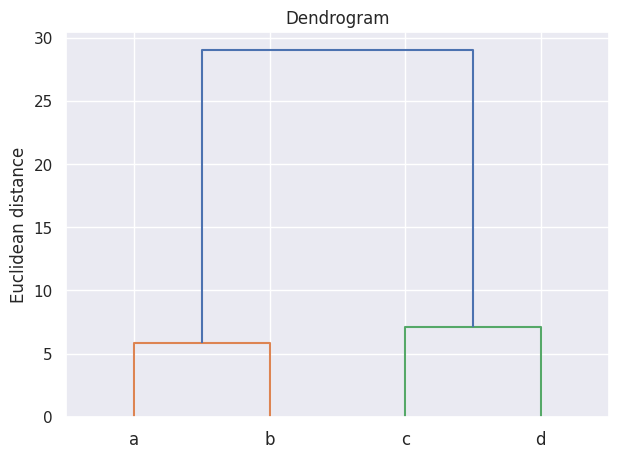

In [ ]:
#Linkage Matrix
links = linkage(df, method = 'ward')

#plotting dendrogram
dendro = dendrogram(links, labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

** Probamos con un dataset grande**


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data

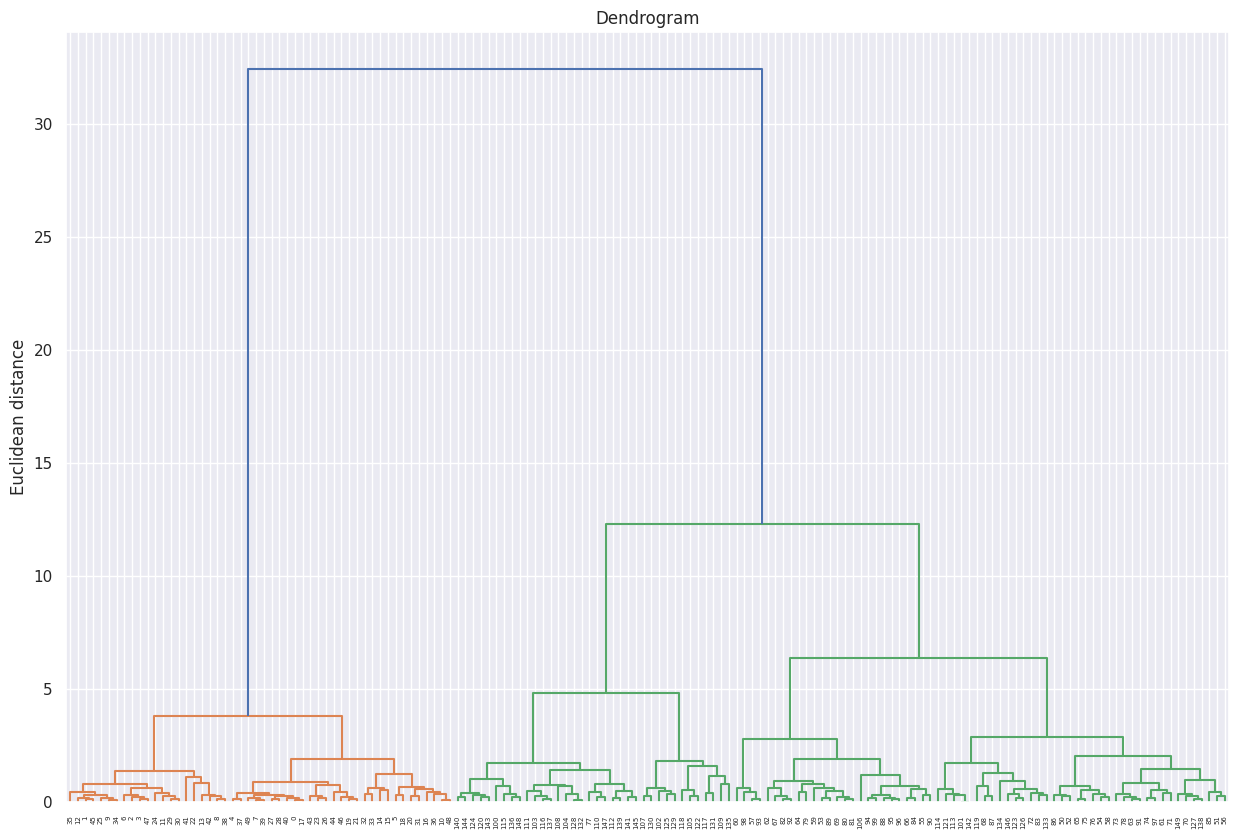

In [ ]:
#Linkage Matrix
links = linkage(iris_data, method = 'ward')

#plotting dendrogram
plt.figure(figsize=(15,10))
dendro = dendrogram(links)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = agg_clustering.fit_predict(iris_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: >

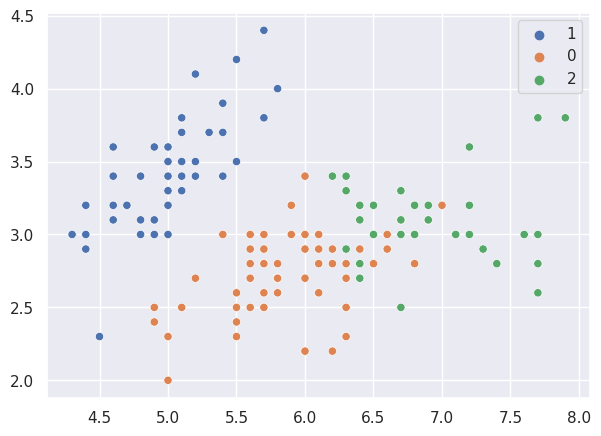

In [ ]:
sns.scatterplot(x=iris_data[:, 0], y=iris_data[:, 1], hue=labels.astype(str))